In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,roc_auc_score,auc,roc_auc_score,roc_curve
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer







Load sample data set

In [27]:
data=load_breast_cancer()
pd.DataFrame(data.data,columns=data.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
pd.DataFrame(data.target,columns=['type']).head()

,type
0,0
1,0
2,0
3,0
4,0


In [29]:
#check what these output features represent
data.target_names

array(['malignant', 'benign'], dtype='<U9')

Rescale the input features

In [30]:
X=data.data
y=data.target
scaler=MinMaxScaler(feature_range=(0,1))
X=scaler.fit_transform(data.data)

Split into train (2/3) and test (1/3) sets

In [31]:
test_size=0.33
seed=7
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_size,random_state=seed)

In [32]:
model=LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_train)
prediction

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,

PLot the confusion metrix

In [33]:

print(confusion_matrix(y_train,prediction))


[[140  13]
 [  2 226]]


Accuracy score

In [34]:
accuracy_score(y_train,prediction)

0.9606299212598425

classification report

In [35]:
print(classification_report(y_train,prediction,target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.99      0.92      0.95       153
      benign       0.95      0.99      0.97       228

    accuracy                           0.96       381
   macro avg       0.97      0.95      0.96       381
weighted avg       0.96      0.96      0.96       381



In [36]:
# Define a function to plot the ROC/AUC
def plotRocAuc(model, X, y):
    
    probabilities = model.predict_proba(X)
    probabilities = probabilities[:, 1]  # keep probabilities for first class only
        
    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y, probabilities)    
    
    # Plot the "dumb model" line
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    # Plot the model line
    plt.plot(fpr, tpr, marker='.')
    plt.text(0.75, 0.25, "AUC: " + str(round(roc_auc_score(y, probabilities),2)))
    
    # show the plot
    plt.show()

ROC / AUC

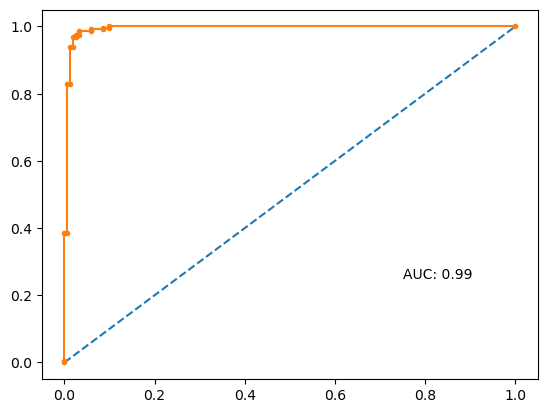

In [37]:
plotRocAuc(model,X_train,y_train)

Evaluate the model 

LogisticRegression
----------------------------------
Confusion matrix:
[[ 53   6]
 [  0 129]]

Accuracy: 0.9680851063829787

Classification report:
              precision    recall  f1-score   support

   malignant       1.00      0.90      0.95        59
      benign       0.96      1.00      0.98       129

    accuracy                           0.97       188
   macro avg       0.98      0.95      0.96       188
weighted avg       0.97      0.97      0.97       188


ROC / AUC:


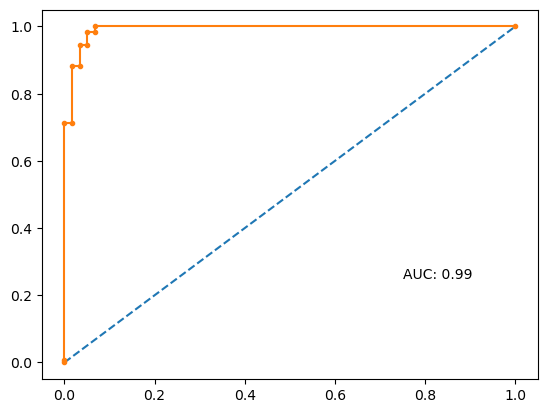

In [38]:
# Evaluate the model
predictions = model.predict(X_test)

print(type(model).__name__)    
print("----------------------------------")
print("Confusion matrix:")
print(confusion_matrix(y_test, predictions))

print("\nAccuracy:", accuracy_score(y_test, predictions))

print("\nClassification report:")
print(classification_report(y_test, predictions, target_names=data.target_names))

print("\nROC / AUC:")
plotRocAuc(model, X_test, y_test)

In [39]:
from sklearn.utils import resample
# Split into train (2/3) and test (1/3) sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [41]:
# Put X and y training data back together again
Xy_train = pd.concat([X_train, y_train], axis=1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid